#Imports

In [22]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Scaling & silhouette
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
# yellowbrick -> 머신러닝 시각화도구

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Standard Scaler

In [24]:
df= pd.read_csv('/content/drive/MyDrive/시소프로젝트/1-1 excellent 컷오프 완료.csv',index_col=0)
df.reset_index()
df.head(1)

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,...,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,...,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [25]:
df2 = df.iloc[:,3:]
df2.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
1,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,590,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [26]:
column = df2.columns
column

Index(['공원수', '도서관수', '병원수', '배움터수', '동별강좌정원', '사고건수', '독거노인포함', '대중교통', '합계',
       '일반', '65세이상고령자', '전연령별독거노인비율', '노인인구별독거노인비율', 'X', 'Y', '위도UTMK',
       '경도UTMK', '디지털정보지수', '총합 9'],
      dtype='object')

In [27]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns = column)
df2_scaled.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
0,1.995322,2.103655,-0.314159,-0.466936,-0.746355,-0.176186,-1.136415,-0.447988,-1.096052,-0.691643,-1.636607,0.925393,1.00287,0.38401,-0.288785,0.386124,-0.286411,-1.618131,-0.391469


In [28]:
df3 = df2_scaled.copy()
df3.head(1)

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,합계,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
0,1.995322,2.103655,-0.314159,-0.466936,-0.746355,-0.176186,-1.136415,-0.447988,-1.096052,-0.691643,-1.636607,0.925393,1.00287,0.38401,-0.288785,0.386124,-0.286411,-1.618131,-0.391469


## Hierarchical

In [29]:
final_sc = df2.copy()
X_sc = df2_scaled.copy()

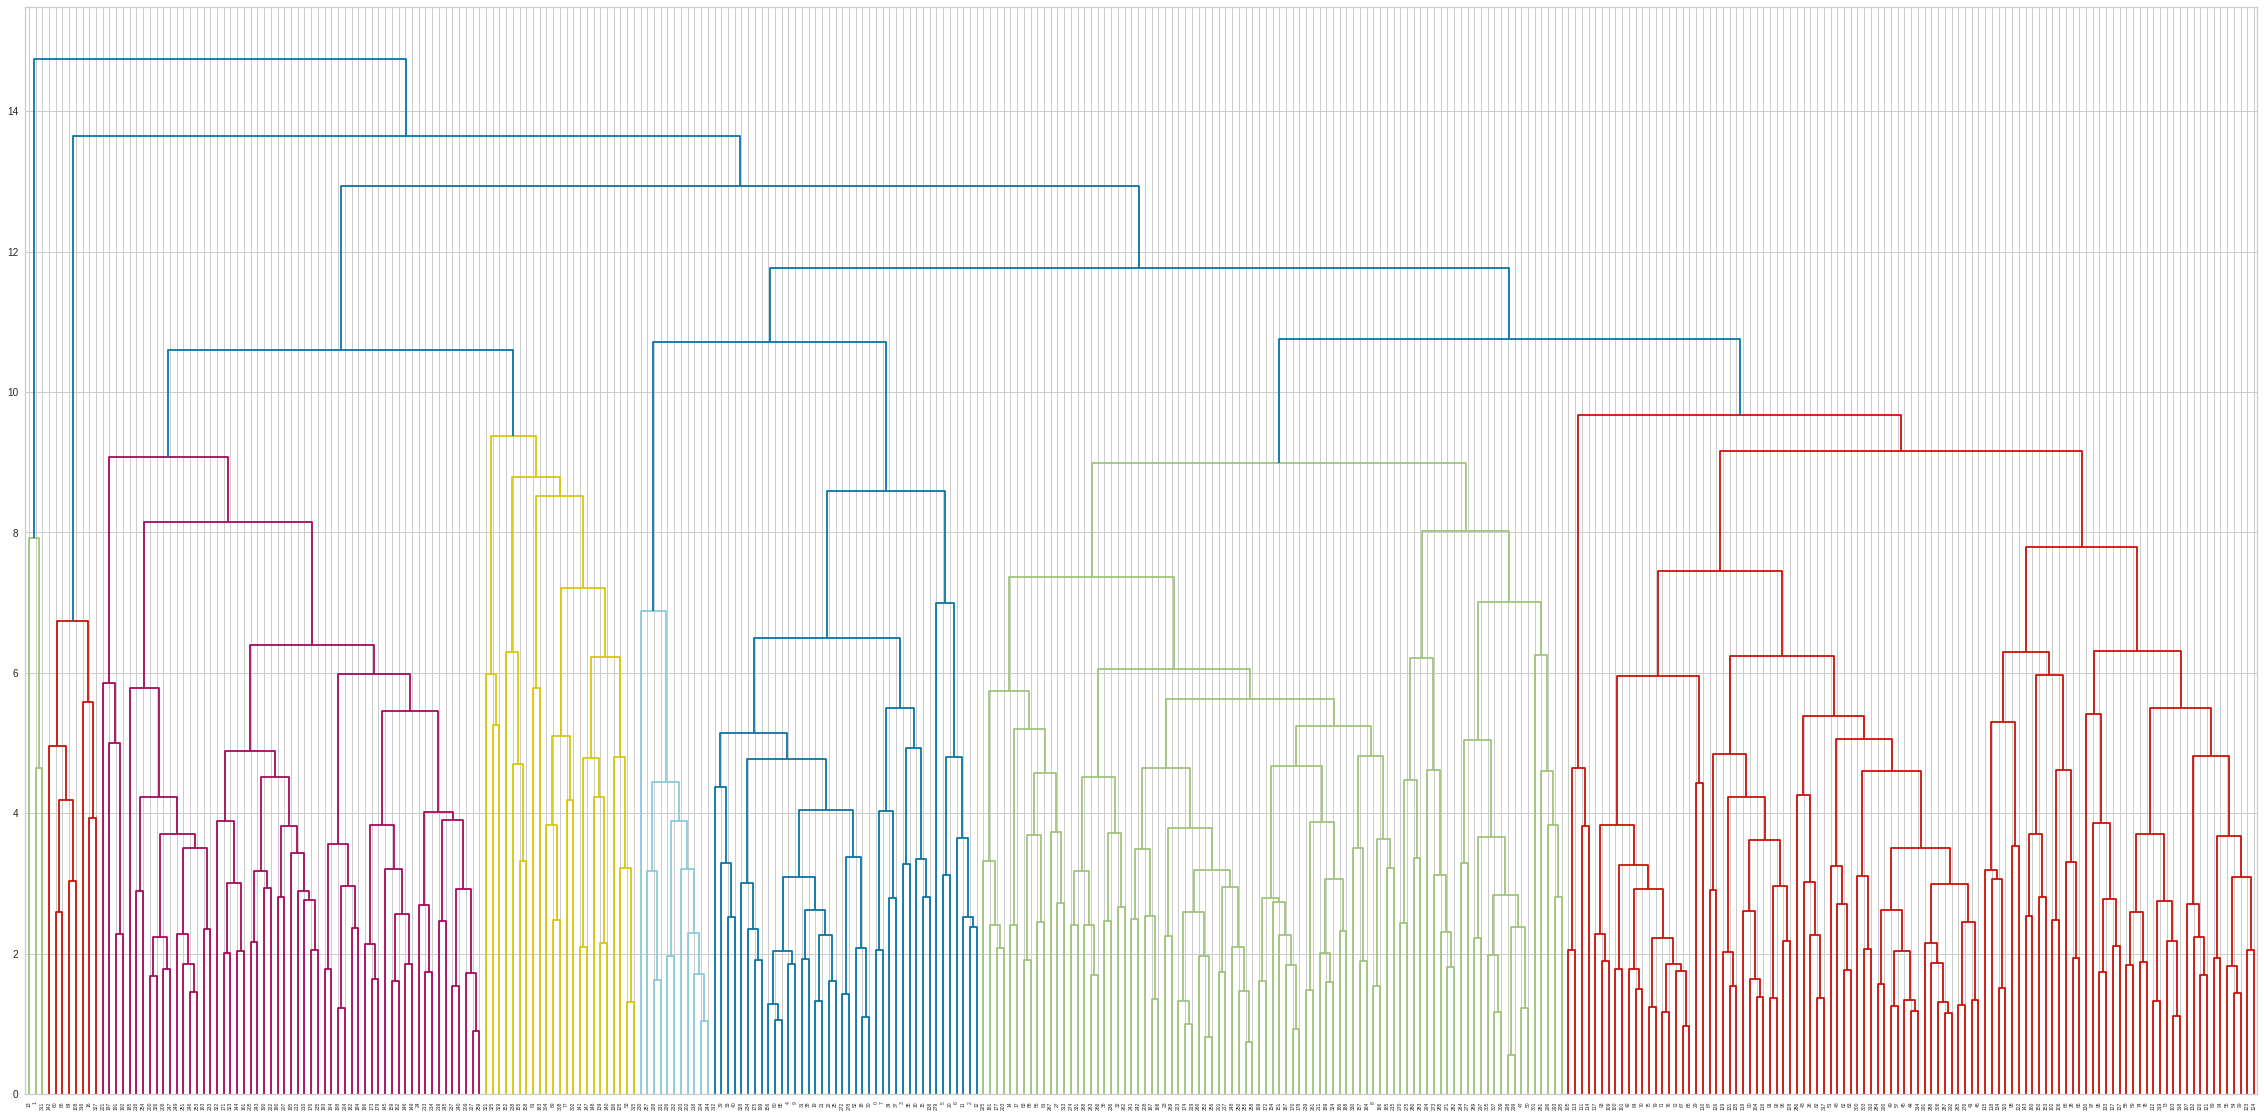

In [30]:
# sc 스케일링한 데이터 덴드로그램 그리기
clusters = linkage(y=X_sc, method='complete', metric='euclidean')
plt.figure(figsize=(40,20))

dendrogram(clusters)
plt.show()

In [31]:
# 함수 만들기 -> 군집개수, 각 군집당 실루엣 계수, 분산
def silhouette_hc(final_, X, t) :
    clusters = linkage(y=X, method = 'complete', metric = 'euclidean')
    #  complete linkage 방식은 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식
    #  single linkage 방식은 두 클러스터에서 가장 가까운 거리를 사용하는 방식
    cut_tree = fcluster(clusters, t = t, criterion = 'distance')
    final_['cluster'] = cut_tree # 예측값 넣기 
    final_['silhouette_coeff'] = silhouette_samples(X, final_['cluster'])
    n_group = len(np.unique(final_['cluster']) )

    avg_score = silhouette_score(X, final_['cluster'])
    avg_by_count = final_.groupby('cluster')['silhouette_coeff'].count()
    avg_by_cluster = final_.groupby('cluster')['silhouette_coeff'].mean()
    var = np.var(final_sc['silhouette_coeff'])
    
    print('군집 계수 : ', n_group)
    print('군집 개수 : ', avg_by_count)
    print('실루엣평균 : ', avg_score)
    print('군집 분산 : ', var)
    print(avg_by_cluster)

In [43]:
# n_cluster가 
silhouette_hc(final_sc, X_sc, t=14)

군집 계수 :    2
군집 개수 :  cluster
1      3
2    329
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.4653739749063527
군집 분산 :    0.011598786044605762
cluster
1    0.382252
2    0.466132
Name: silhouette_coeff, dtype: float64


In [33]:
silhouette_hc(final_sc, X_sc, t=13)

군집 계수 :    3
군집 개수 :  cluster
1      3
2      8
3    321
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.267112082324448
군집 분산 :    0.006015099195254364
cluster
1    0.380526
2    0.340649
3    0.264219
Name: silhouette_coeff, dtype: float64


In [34]:
silhouette_hc(final_sc, X_sc, t=12)

군집 계수 :    4
군집 개수 :  cluster
1      3
2      8
3     80
4    241
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.1489525525028431
군집 분산 :    0.014330570623612366
cluster
1    0.371264
2    0.328283
3    0.121739
4    0.149266
Name: silhouette_coeff, dtype: float64


In [37]:
silhouette_hc(final_sc, X_sc, t=11)

군집 계수 :    5
군집 개수 :  cluster
1      3
2      8
3     80
4     51
5    190
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.07484737248726164
군집 분산 :    0.01334568736468697
cluster
1    0.287520
2    0.315148
3    0.093575
4    0.135373
5    0.037240
Name: silhouette_coeff, dtype: float64
